![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

# Data Explanatory

In [76]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [77]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [78]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


# Checking For Messing Values

In [79]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

array([[<AxesSubplot: title={'center': 'culmen_length_mm'}>,
        <AxesSubplot: title={'center': 'culmen_depth_mm'}>],
       [<AxesSubplot: title={'center': 'flipper_length_mm'}>,
        <AxesSubplot: title={'center': 'body_mass_g'}>]], dtype=object)

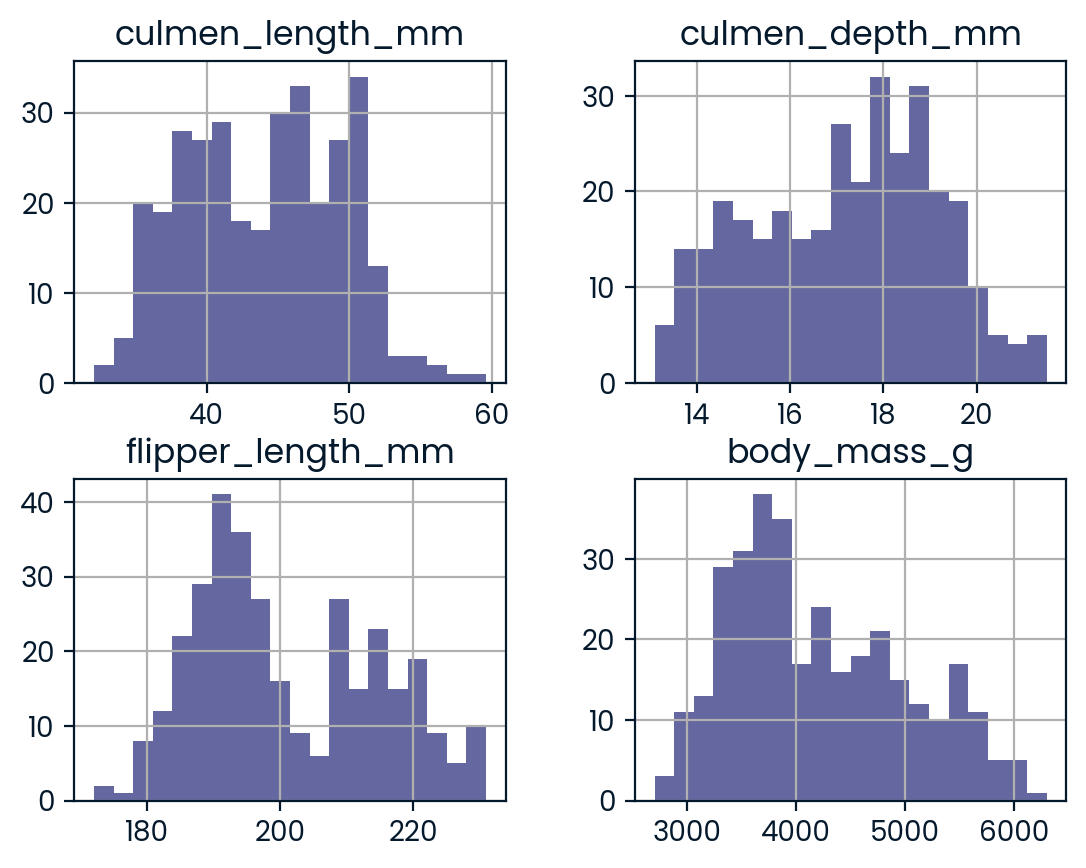

In [80]:
penguins_df.hist(bins=20)

# Transforming All Data To Numerical

In [81]:
sex_map = {'MALE':1.0, 'FEMALE':0.0}
penguins_df['sex'] = penguins_df['sex'].map(sex_map)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,1.0


# Scaling and Checking Best K Value

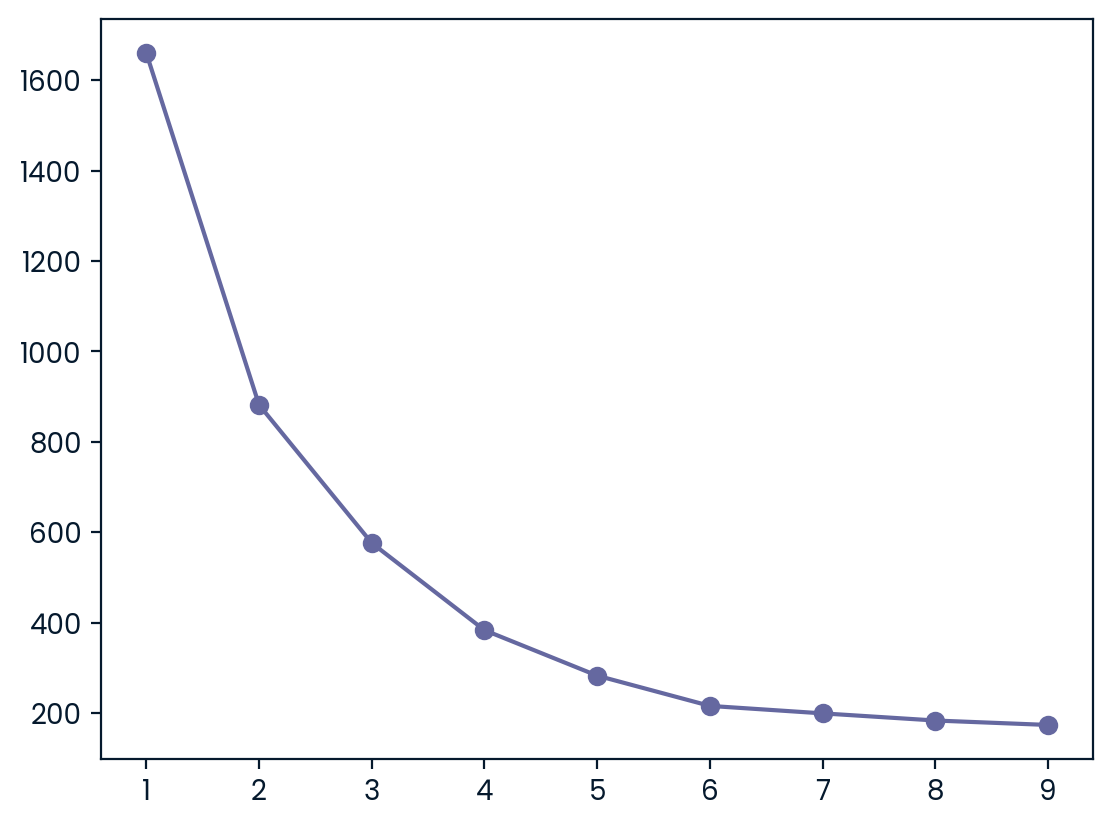

In [82]:
scaler = StandardScaler()
scaled_penguins_df = scaler.fit_transform(penguins_df)
inertia_dict = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_penguins_df)
    inertia_dict[k] = model.inertia_
fig, ax = plt.subplots()
ax.plot(inertia_dict.keys(), inertia_dict.values(), marker='o')
plt.show()

# Recording The Means

In [83]:
model = KMeans(n_clusters=4)
labels = model.fit_predict(scaled_penguins_df)
penguins_df['labels'] = labels
stat_penguins = penguins_df.groupby('labels').mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
labels,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,40.217757,17.611215,189.046729,3419.158879,0.0
2,45.563793,14.237931,212.706897,4679.741379,0.0
3,49.473770,15.718033,221.540984,5484.836066,1.0
